# Plots to analyze posterior

In [16]:
import os, sys
os.chdir('/Users/dananjayaliyanage/git/observables/vah_design/emulation')
sys.path.append('/Users/dananjayaliyanage/git/surmise/')

In [17]:
from plotting import *
from priors import xlimits
from priors import prior_VAH

In [18]:
xlimits.shape

(15, 2)

In [19]:
import pickle
import pyximport
pyximport.install(setup_args={"include_dirs":np.get_include()},
                  reload_support=True)
                  
cal_name = 'VAH_' + 'PCGPR' + '_calibrator_PTMC'
with open(cal_name + '.pkl' , 'rb') as file:
    cal = pickle.load(file)   

In [20]:
random_draws_calibration_chain = False
# By setting above to true we will use surmise inbuilt random resampling of the MCMC chain that has been constructed during calibration.
# We also save the final chain as a csv file. Instead of random resampling we can directly load that. This will be redundant if we add
# a function to the calibration.py to return the full chain from the calibration instead of resampling. 
if random_draws_calibration_chain:
    post = cal.theta.rnd(20000)
    post_df = pd.DataFrame(post,columns=model_param_dsgn)
else:
    post = cal.info['thetarnd']
    post_df = pd.DataFrame(post,columns=model_param_dsgn)
prior = prior_VAH.rnd(post_df.shape[0])
prior_df = pd.DataFrame(prior,columns=model_param_dsgn)


In [21]:
print(post_df.shape, prior_df.shape)

(40000, 15) (40000, 15)


In [22]:
# If false, do not try to find the MAP value and load it from a saved file.
find_map_param = True
from scipy import optimize


if find_map_param == True:
    bounds=[(a,b) for (a,b) in zip(xlimits[:,0],xlimits[:,1])]
    x0=[(a+b)/2 for (a,b) in zip(xlimits[:,0],xlimits[:,1])]

    print(bounds)
    #rslt = optimize.differential_evolution(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(),
    #                                        bounds=bounds,
    #                                       maxiter=100000,
    #                                        tol=1e-9,
    #                                        disp=True)
    #rslt = optimize.minimize(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten(), x0=x0, 
    #                        method= 'L-BFGS-B', bounds=bounds, tol=1e-15)
    minimizer_kwargs = {"method": "L-BFGS-B", "bounds": bounds,"tol":1e-11}
    rslt=optimize.basinhopping(lambda x: -cal.theta.lpdf(theta=np.array(x).reshape(-1,15)).flatten()
                                ,x0,niter=100,minimizer_kwargs=minimizer_kwargs)
    print(rslt.x)
    MAP = rslt.x
    np.save(cal_name, MAP)
else:
    MAP = np.load(cal_name+'.npy')

[(10.0, 30.0), (-0.7, 0.7), (0.5, 1.5), (0.0, 1.7), (0.3, 2.0), (0.135, 0.165), (0.13, 0.3), (0.01, 0.2), (-2.0, 1.0), (-1.0, 2.0), (0.01, 0.25), (0.12, 0.3), (0.025, 0.15), (-0.8, 0.8), (0.3, 1.0)]
[ 2.12298725e+01 -1.76514207e-01  9.96357426e-01  4.18050468e-01
  1.15316540e+00  1.43948435e-01  2.42787940e-01  8.06869937e-02
 -6.49858265e-01  6.70949480e-01  1.00000000e-02  1.60442994e-01
  7.01282208e-02 -5.25361499e-01  4.87136253e-01]


In [23]:
nsamples = 40000
prune = 10

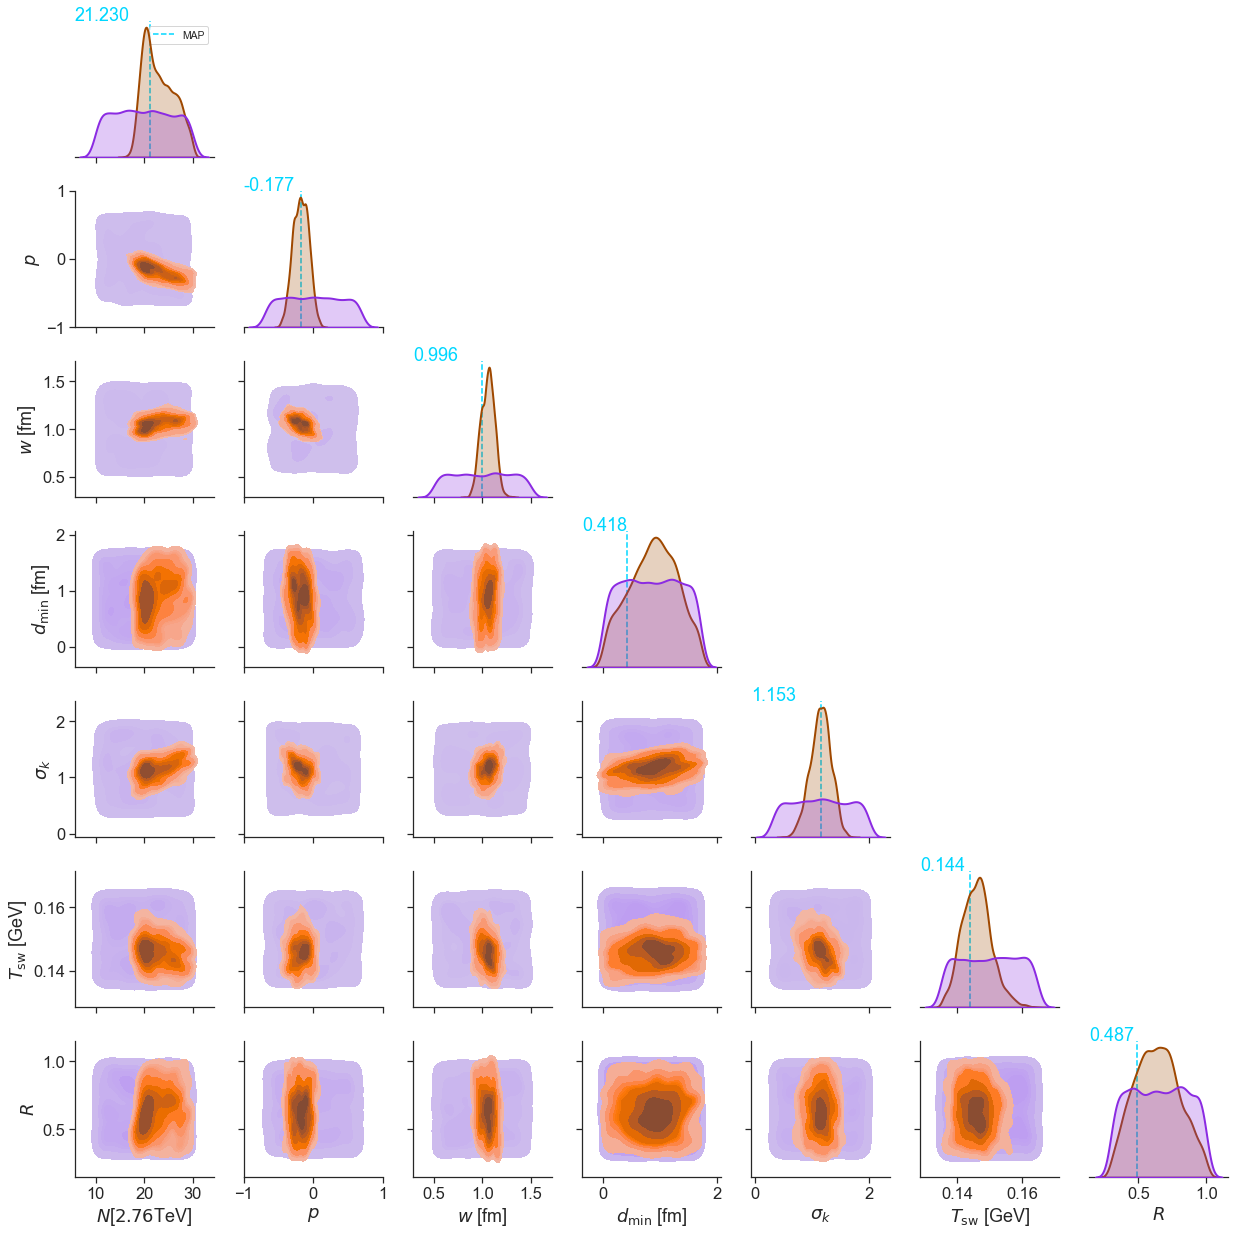

In [24]:
plot_corner_no_viscosity(post_df,prior_df,'PCGPR',nsamples,prune, MAP)

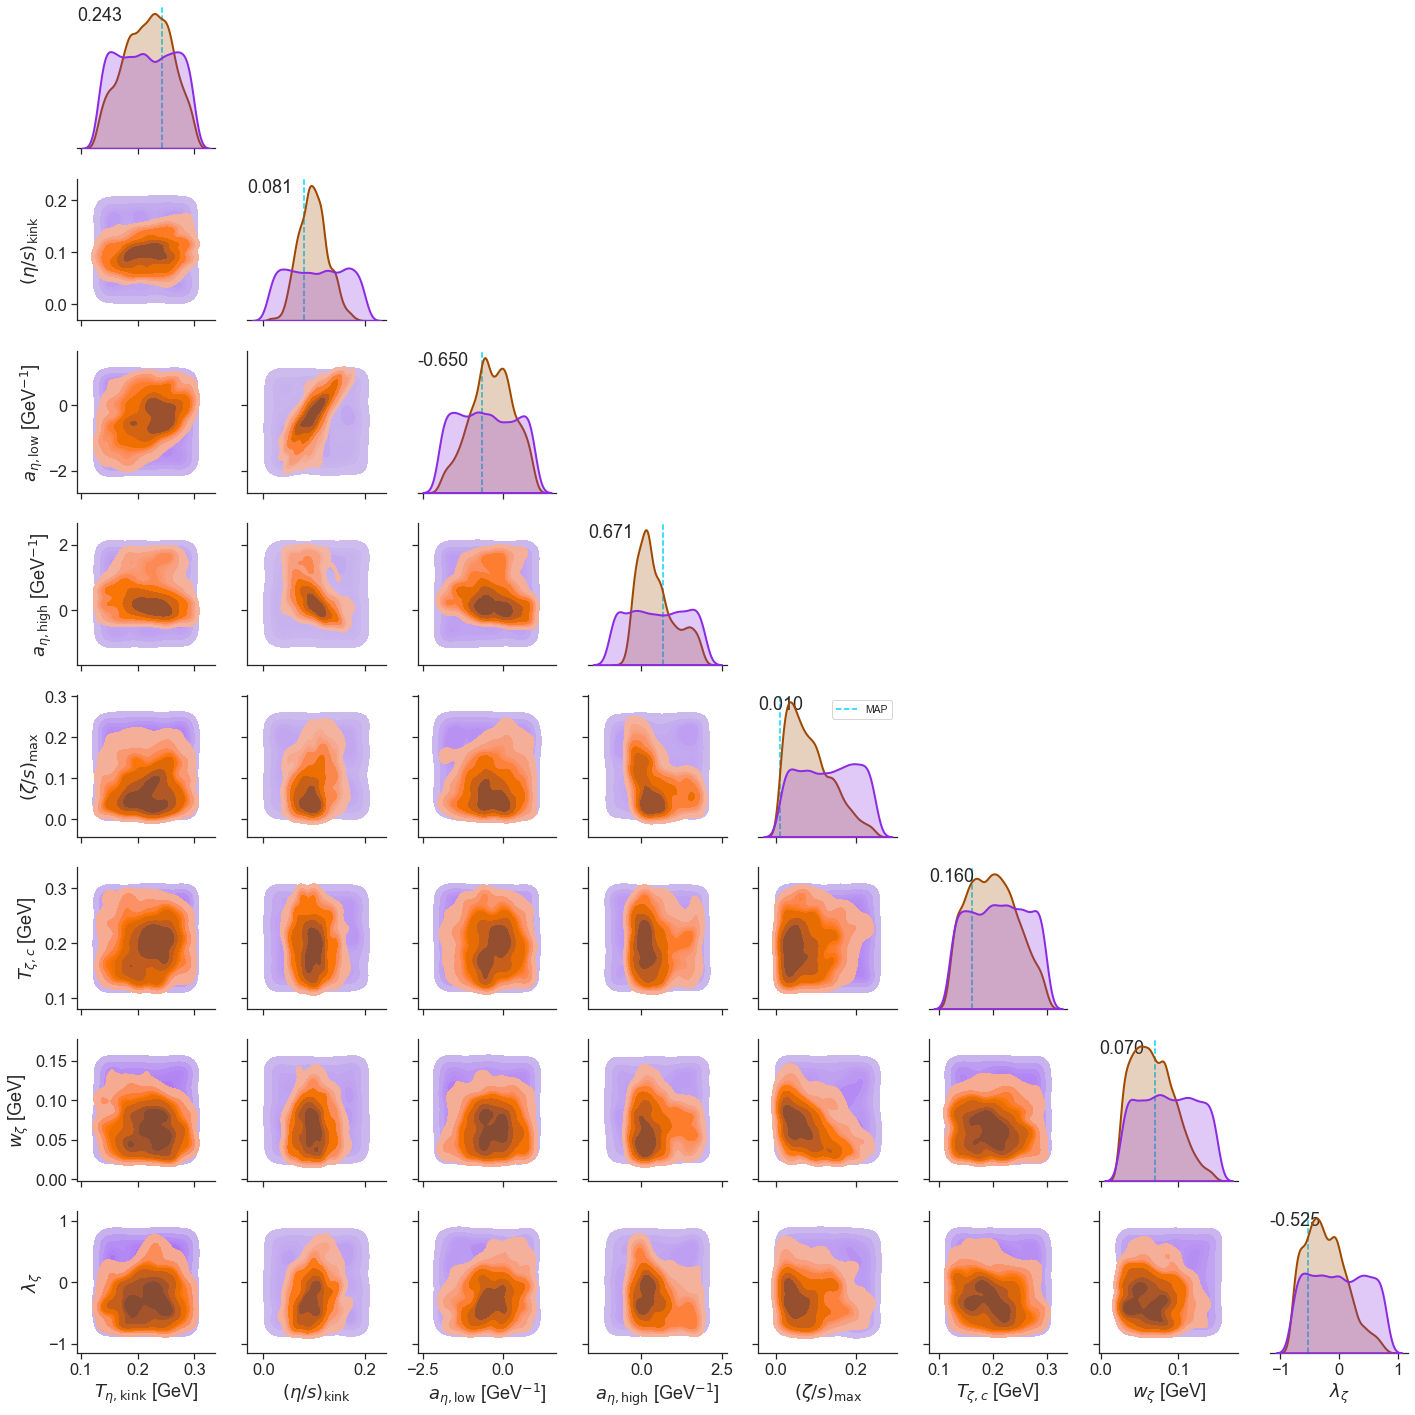

In [25]:
plot_corner_viscosity(post_df,prior_df,'PCGPR',nsamples,prune, MAP)

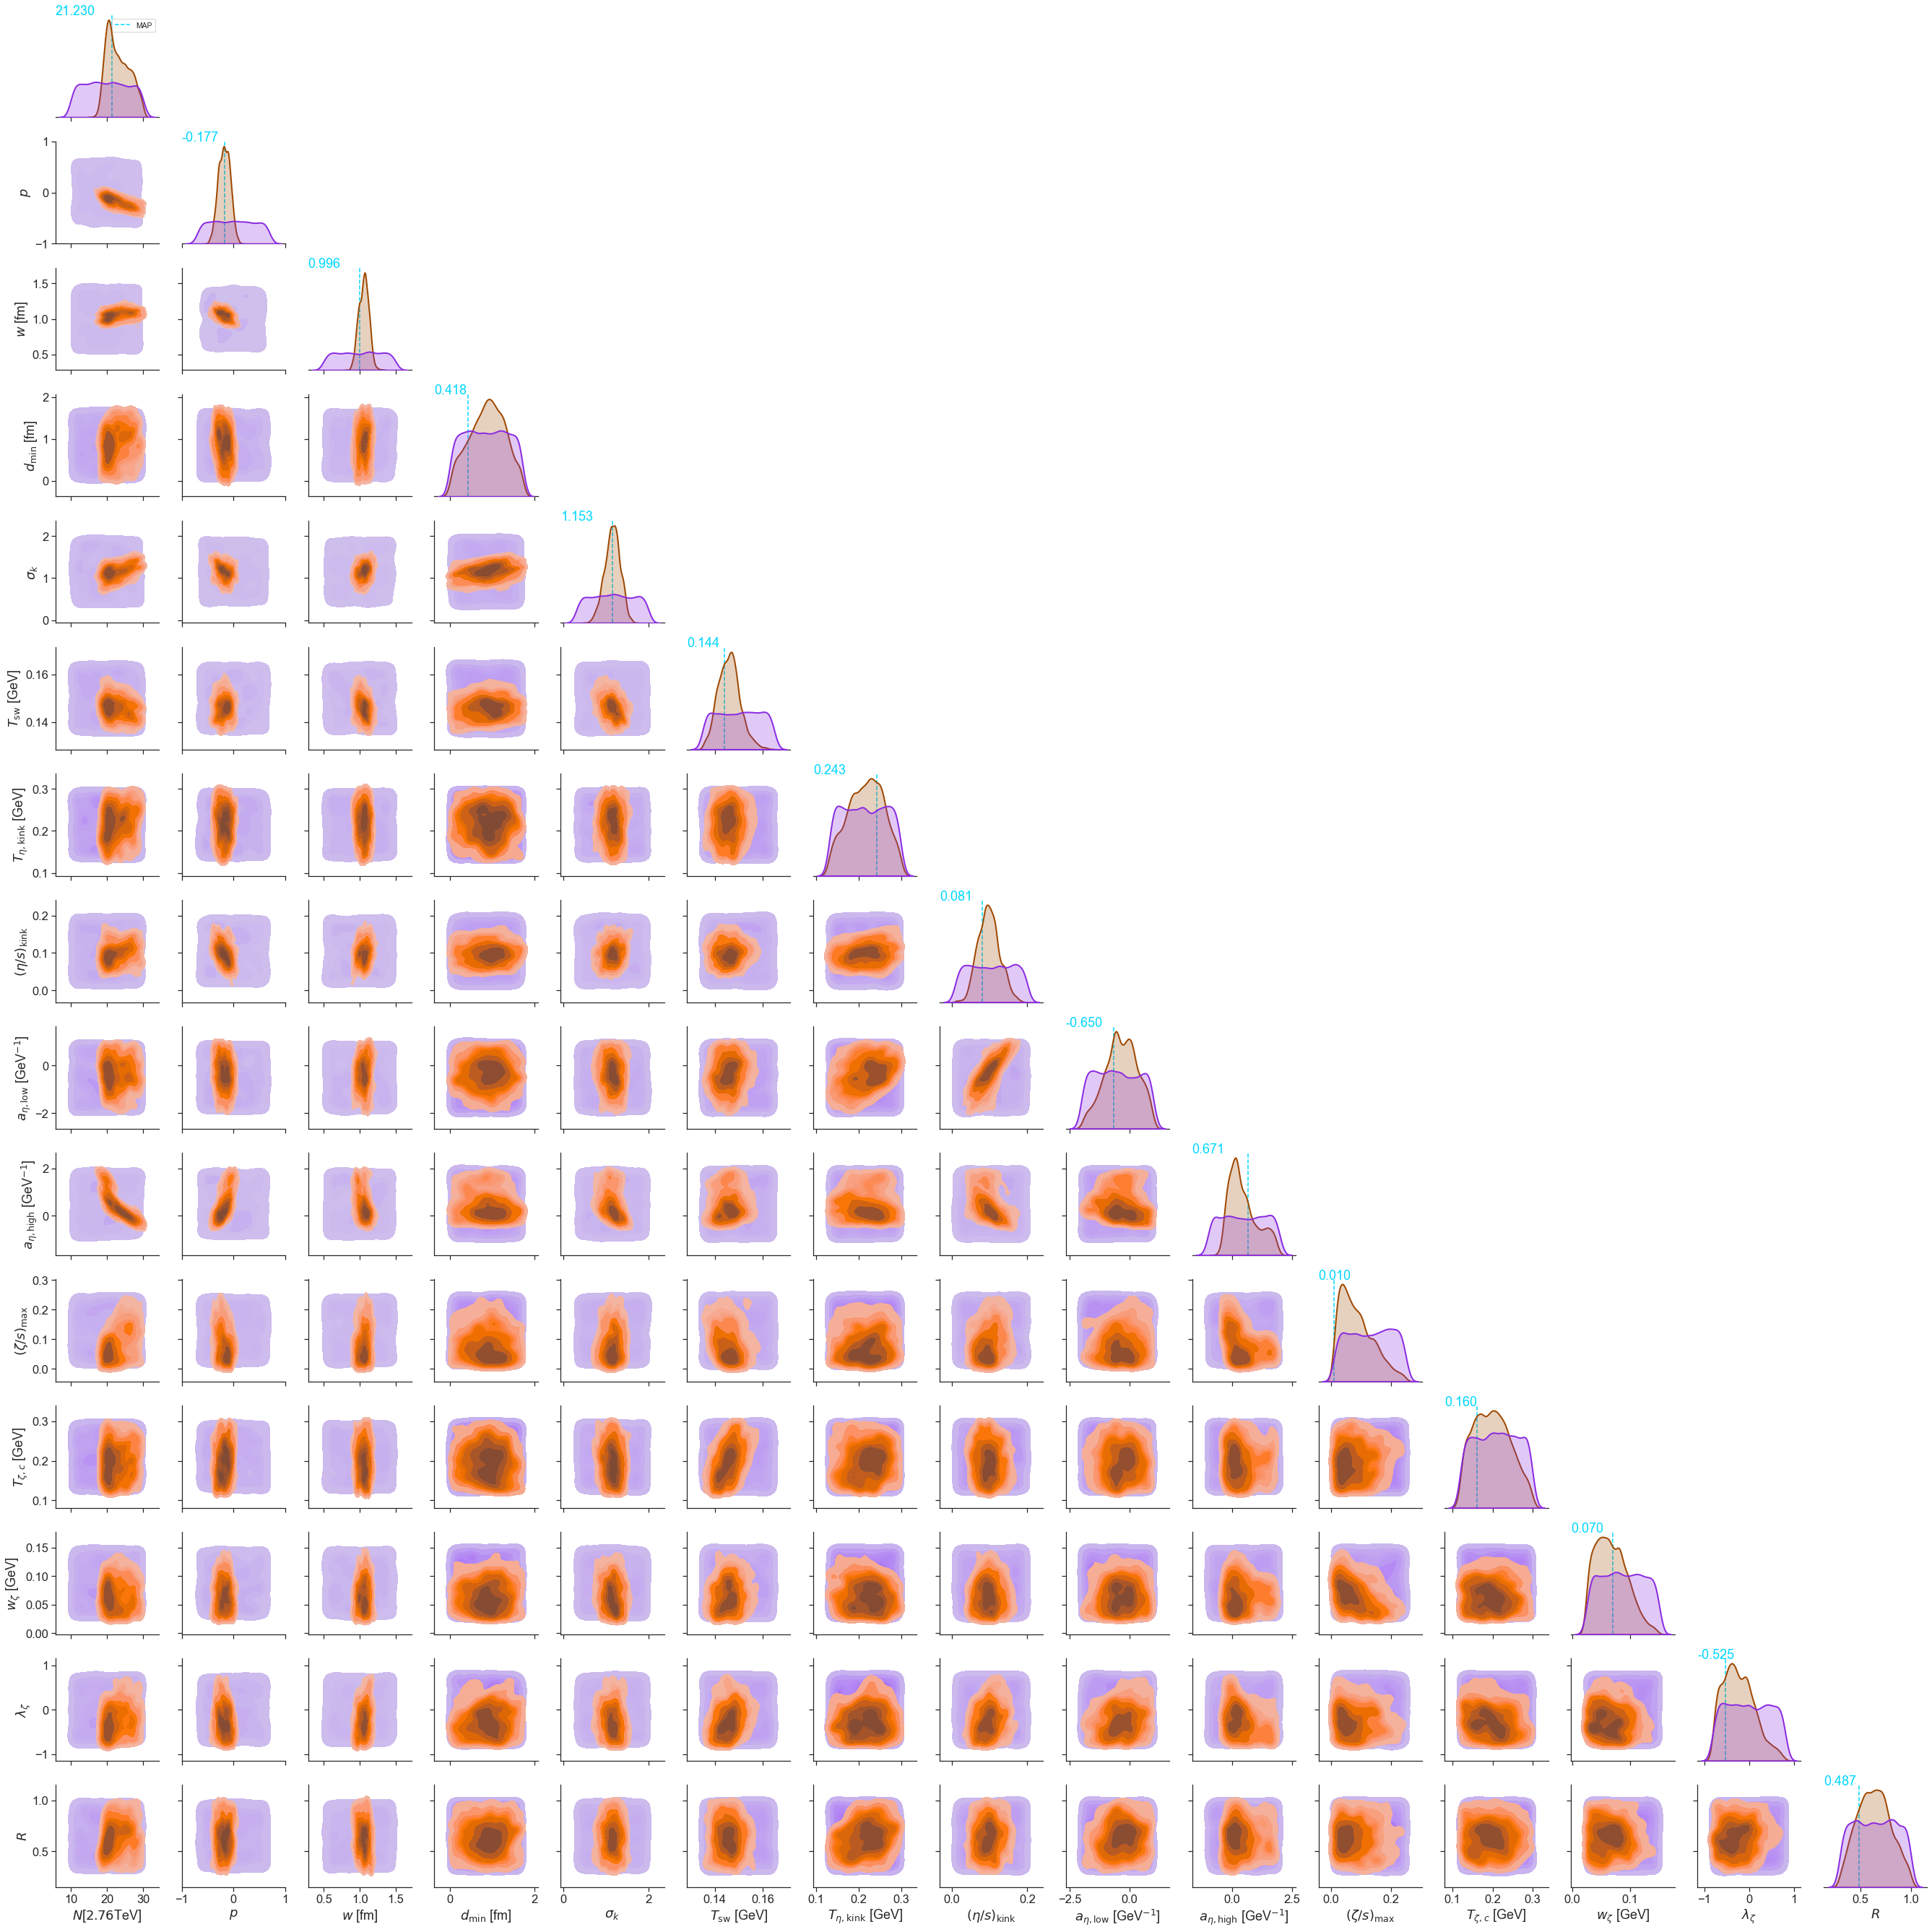

In [26]:
plot_corner_all(post_df,prior_df,'PCGPR',nsamples,prune, MAP)

/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:382: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


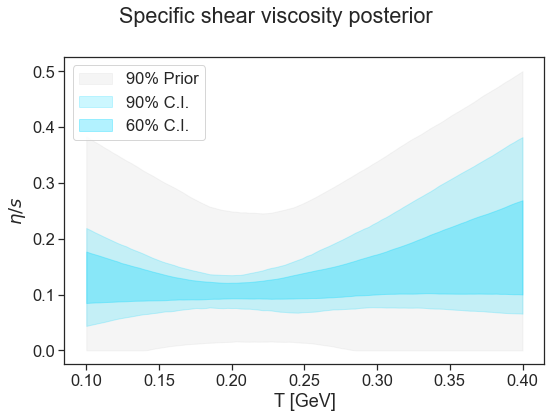

In [27]:
plot_shear(post_df,'PCGPR',xlimits, nsamples,prune)

/Users/dananjayaliyanage/git/observables/vah_design/emulation/plotting.py:431: UserWarning: This figure was using constrained_layout==True, but that is incompatible with subplots_adjust and or tight_layout: setting constrained_layout==False. 
  plt.tight_layout()


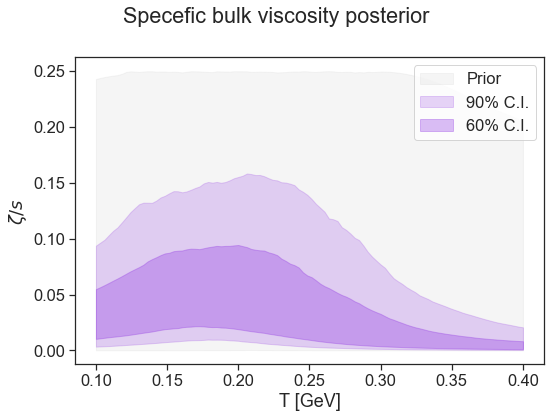

In [28]:
plot_bulk(post_df,'PCGPR',xlimits, nsamples,prune)